In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
# tf.__version__

Using TensorFlow backend.


The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples (numbers from 0-9 with 6000 sample for each), and a test set of 10,000 examples (1000 sample for wach number). It is a subset of a larger set available from MNIST. The digits have been size-normalized and centered in a fixed-size image (28 x 28).
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

mnist=tf.keras.datasets.mnist

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [4]:
np.shape(x_train)

(60000, 28, 28)

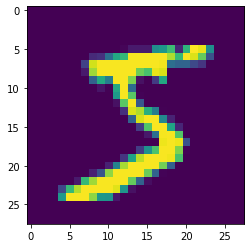

In [5]:
#plotting one of the image
#,cmap=plt.cm.binary will change the plot to black and white
plt.imshow(x_train[0]) 
plt.show()

In [6]:
# show the tensore
print(x_train[0][:10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
# here we normalize data to speed up the optimization time
# axis=1 means normalize on row
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

1- There are two ways to build Keras models: sequential and functional. The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs

2- Image is a 2-D vector and in fully connected hidden layer(Dense layer)  we need to flat the inputted data 

3- Dense layer is a linear operation in which every input is connected to every output by a weight Generally followed by a non-linear activation function.

The number of the nodes in each dense layer is a hyper parameter (These are the latent features)
The last dense layer should be set to number of the output categories.

4- For the more than two output category softmax activation function is a good choice and we can use logistic activation for binary output.

In [8]:
# build the model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten((28,28)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

AttributeError: 'tuple' object has no attribute 'lower'

The most common optimizer for at least start is adam

For the multi categories output sparse_categorical_crossentropy and for binary output binary_categorical_crossentropy are most commons.

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 38s 631us/step - loss: 0.2535 - acc: 0.9260
Epoch 2/3
60000/60000 [==============================] - 37s 611us/step - loss: 0.1005 - acc: 0.9696
Epoch 3/3
60000/60000 [==============================] - 36s 607us/step - loss: 0.0709 - acc: 0.9779


Here we check the model validation for over fitting possibility

In [14]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 2s 243us/step
6.3341991928100585 0.6064


In [32]:
model.save('test_save')
new_model=tf.keras.models.load_model('test_save')

In [42]:
# prediction always take a list
#shape x_test=(10000, 28, 28)
predictions=new_model.predict([x_test])
np.shape(predictions)

(10000, 10)

In [43]:
predictions[0]

array([6.61712647e-07, 2.55809226e-07, 3.06082402e-05, 1.11375746e-04,
       1.38219924e-08, 6.85597297e-06, 3.46534079e-10, 9.99671102e-01,
       9.35516709e-07, 1.78059592e-04], dtype=float32)

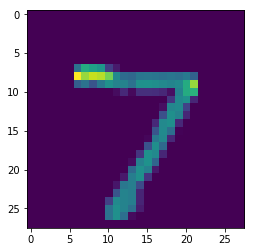

In [34]:
plt.imshow(x_test[0])
plt.show()

In [35]:
print(np.argmax(predictions[0]))

7
